In [1]:
#####################################################################################################################################
#
#    CREATED : Jan 31, 2025
#
#
#    NAME : 10)CheckForBugs.ipynb
#
#   
#   
#    WHAT :  Check that the ω_cnc, ω_cng, ω_corrCC, ω_corrGC have the same number
#            Check the bgAverage and bgCovMatrix is the same
#            Finally, check the MCMC
#
#
#    NOTE: 
#
#
#
################################################################################################################################

In [2]:
from __future__ import division
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy
import matplotlib.pyplot as plt
import math
import sys, platform, os
import re
import time
import pprint
from numpy import genfromtxt
import importlib
plt.rcParams['figure.figsize']=(18,18)
%matplotlib inline
print(os.getcwd())
print(platform.python_version(),'python version')
import matplotlib.cm as cmap

#Astropy
from astropy import units as u
from astropy.coordinates import Angle
from astropy import wcs
from astropy.coordinates import SkyCoord
from astropy.utils.data import download_file
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.visualization import astropy_mpl_style
#Astropy cosmology
from astropy.cosmology import WMAP9 as cosmo

#Scipy
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.optimize import minimize

#treecorr
import treecorr
print(treecorr.__version__,'treecorr version')

#cartopy
import cartopy.crs as ccrs

#pandas
import pandas as pd

# fitsio
import fitsio

#healpy
import healpy as hp 

#Linear Al
from numpy.linalg import inv

#CAMB
import camb
from camb import model, initialpower,get_matter_power_interpolator

# Print
np.set_printoptions(threshold=50)

#corner plot
import corner

#emcee
import emcee

# Let's get the pretty colors
cmap = plt.get_cmap('spring')

current_path = os.getcwd()
print(current_path)

/Users/tzegoh_1/Desktop/-1)tzegoh-finalProject/Final
3.12.7 python version
5.0.2 treecorr version
/Users/tzegoh_1/Desktop/-1)tzegoh-finalProject/Final


'''       USEFUL RESOURCES   
            https://github.com/rmjarvis/TreeCorr
            https://rmjarvis.github.io/TreeCorr/_build/html/guide.html                             
                       https://rmjarvis.github.io/TreeCorr/_build/html/nn.html#treecorr.NNCorrelation
            https://github.com/rmjarvis/TreeCorr/blob/master/tests/Tutorial.ipynb
'''

# Check that the patch centers from treecorr are the same 

## Check the important catGM: if this is wrong, everything else is wrong ! 

In [37]:
zRange=str('070-085')

In [38]:
filename = str('catGM_'+zRange+'_TreeCorr_GalaxyRandom.npy' )
# This is the buggy one where I kept generating catGM, without realising that it changes everytime 
# Where you look for data from scripts
outputData='data/'
Name = str( outputData + filename  )
dataScript = np.load(Name)


# Where you look for data from the notebook ... we will use the catGM from the notebook as the 'standard' one 
outputData=str('../../-1_0th_Project_REDO/3)dataOut/'+zRange+'/')
Name = str( outputData + filename  )
dataNote = np.load(Name)

In [39]:
print(dataScript.shape)
print(dataNote.shape)
print(dataScript)
print(dataNote)
diff = dataScript - dataNote
print(diff)
whereIsItNotZero = np.where(diff != 0.0)[0]
print(whereIsItNotZero)
print(whereIsItNotZero.shape,'is the shape. If this is zero, there are no bugs')


(200, 3)
(200, 3)
[[ 0.29597151 -0.45521201 -0.83975168]
 [ 0.34768622 -0.50169587 -0.79209566]
 [ 0.42498313 -0.51495348 -0.74445433]
 ...
 [ 0.80201742  0.59611327  0.03764348]
 [ 0.74218896  0.66922607 -0.03594465]
 [ 0.74598868  0.66458104  0.04281281]]
[[ 0.29597151 -0.45521201 -0.83975168]
 [ 0.34768622 -0.50169587 -0.79209566]
 [ 0.42498313 -0.51495348 -0.74445433]
 ...
 [ 0.80201742  0.59611327  0.03764348]
 [ 0.74218896  0.66922607 -0.03594465]
 [ 0.74598868  0.66458104  0.04281281]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[]
(0,) is the shape. If this is zero, there are no bugs


 # Also check up catCM: 

In [40]:
filename = str('catCM_'+zRange+'_TreeCorr_ClusterRandom.npy' )
# This is the buggy one where I kept generating catGM, without realising that it changes everytime 
# Where you look for data from scripts
outputData=str('OutputData/'+zRange+'/')
Name = str( outputData + filename  )
dataScript = np.load(Name)

# Where you look for data from the notebook ... we will use the catGM from the notebook as the 'standard' one 
outputData=str('../../-1_0th_Project_REDO/3)dataOut/'+zRange+'/')
Name = str( outputData + filename  )
dataNote = np.load(Name)

In [41]:

print(dataScript.shape)
print(dataNote.shape)
print(dataScript)
print(dataNote)
diff = dataScript - dataNote
print(diff)
whereIsItNotZero = np.where(diff != 0.0)[0]
print(whereIsItNotZero)
print(whereIsItNotZero.shape,'is the shape. If this is zero, there are no bugs')

(200, 3)
(200, 3)
[[ 0.29597151 -0.45521201 -0.83975168]
 [ 0.34768622 -0.50169587 -0.79209566]
 [ 0.42498313 -0.51495348 -0.74445433]
 ...
 [ 0.80201742  0.59611327  0.03764348]
 [ 0.74218896  0.66922607 -0.03594465]
 [ 0.74598868  0.66458104  0.04281281]]
[[ 0.29597151 -0.45521201 -0.83975168]
 [ 0.34768622 -0.50169587 -0.79209566]
 [ 0.42498313 -0.51495348 -0.74445433]
 ...
 [ 0.80201742  0.59611327  0.03764348]
 [ 0.74218896  0.66922607 -0.03594465]
 [ 0.74598868  0.66458104  0.04281281]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[]
(0,) is the shape. If this is zero, there are no bugs


# This means that if you use the same catGM, you will produce the same catC, and catCM etc etc ...

# There are no bugs in your patch centers!

# CHECK Limber Approximation   -- THEORY 

# Check for bugs in ω_cnc

In [42]:
filename = str('THEORY_Planck22_'+zRange+'_ω_cnc.npy')

# Where you look for data from scripts
outputData=str('OutputData/'+zRange+'/')
Name = str( outputData + filename  )
dataScript = np.load(Name)


# Where you look for data from the notebook

outputData=str('../../-1_0th_Project_REDO/3C)dataOut/'+zRange+'/')
Name = str( outputData + filename  )
dataNote = np.load(Name)

In [43]:

print(dataScript.shape)
print(dataNote.shape)
print(dataScript)
print(dataNote)
diff = dataScript - dataNote
print(diff)
whereIsItNotZero = np.where(diff != 0.0)[0]
print(whereIsItNotZero)
print(whereIsItNotZero.shape,'is the shape. If this is zero, there are no bugs')


(7,)
(7,)
[0.02498754 0.01889166 0.01371479 0.01043706 0.00692021 0.00509461
 0.00305698]
[0.02498754 0.01889166 0.01371479 0.01043706 0.00692021 0.00509461
 0.00305698]
[0. 0. 0. 0. 0. 0. 0.]
[]
(0,) is the shape. If this is zero, there are no bugs


# Check for bugs in ω_cng

In [44]:
filename = str('THEORY_Planck22_'+zRange+'_ω_cng.npy')
# Where you look for data from scripts
outputData=str('OutputData/'+zRange+'/')
Name = str( outputData + filename  )
dataScript = np.load(Name)


# Where you look for data from the notebook
outputData=str('../../-1_0th_Project_REDO/3C)dataOut/'+zRange+'/')
Name = str( outputData + filename  )
dataNote = np.load(Name)

In [45]:
print(dataScript.shape)
print(dataNote.shape)
print(dataScript)
print(dataNote)
diff = dataScript - dataNote
print(diff)
whereIsItNotZero = np.where(diff != 0.0)[0]
print(whereIsItNotZero)
print(whereIsItNotZero.shape,'is the shape. If this is zero, there are no bugs')


(7,)
(7,)
[0.00609931 0.00463297 0.00402922 0.00353398 0.00275325 0.00212679
 0.00169338]
[0.00609931 0.00463297 0.00402922 0.00353398 0.00275325 0.00212679
 0.00169338]
[0. 0. 0. 0. 0. 0. 0.]
[]
(0,) is the shape. If this is zero, there are no bugs


# This means that there are no bugs in the LIMBER APPROX theory

# Check the input 

# Check for bugs in Normalised dc

In [46]:
filename = str(zRange+'_Normalised_dc.npy') 

# Where you look for data from scripts
outputData=str('OutputData/'+zRange+'/')
Name = str( outputData + filename  )
dataScript = np.load(Name)


# Where you look for data from the notebook

outputData=str('../../-1_0th_Project_REDO/3)dataOut/'+zRange+'/')
Name = str( outputData + filename  )
dataNote = np.load(Name)

In [47]:
print(dataScript.shape)
print(dataNote.shape)
print(dataScript)
print(dataNote)
diff = dataScript - dataNote
print(diff)
whereIsItNotZero = np.where(diff != 0.0)[0]
print(whereIsItNotZero)
print(whereIsItNotZero.shape,'is the shape. If this is zero, there are no bugs')


(10,)
(10,)
[7.72073594 9.37517936 6.61777366 8.82369822 6.61777366 7.1692548
 7.1692548  4.96333025 3.86036797 4.96333025]
[7.72073594 9.37517936 6.61777366 8.82369822 6.61777366 7.1692548
 7.1692548  4.96333025 3.86036797 4.96333025]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[]
(0,) is the shape. If this is zero, there are no bugs


# Check for bugs in Normalised dc_G

In [48]:
filename = str(zRange+'_Normalised_dc_G.npy') 

# Where you look for data from scripts
outputData=str('OutputData/'+zRange+'/')
Name = str( outputData + filename  )
dataScript = np.load(Name)


# Where you look for data from the notebook

outputData=str('../../-1_0th_Project_REDO/3)dataOut/'+zRange+'/')
Name = str( outputData + filename  )
dataNote = np.load(Name)

In [49]:
print(dataScript.shape)
print(dataNote.shape)
print(dataScript)
print(dataNote)
diff = dataScript - dataNote
print(diff)
whereIsItNotZero = np.where(diff != 0.0)[0]
print(whereIsItNotZero)
print(whereIsItNotZero.shape,'is the shape. If this is zero, there are no bugs')

(50,)
(50,)
[5.92765041 5.8376564  5.88795381 5.91614742 5.97343684 5.95200969
 6.03816937 5.99847276 5.92404163 5.98629312 6.03952266 6.00929911
 6.03771827 6.10966837 6.14056856 6.07561048 6.12658453 6.11282605
 6.16222126 6.24815539 6.26213942 6.30454261 6.43761645 6.52129509
 6.56933701 6.65662443 6.6514368  6.74616734 6.72203361 6.73804758
 6.81676414 6.91645675 7.11561642 7.14290784 7.26447869 7.35763038
 7.40702559 7.51168027 7.4961174  7.40815333 7.43454255 7.42664834
 7.43048267 7.44424116 7.45777409 7.50807149 7.53152858 7.52092778
 7.48777209 7.54145273]
[5.92765041 5.8376564  5.88795381 5.91614742 5.97343684 5.95200969
 6.03816937 5.99847276 5.92404163 5.98629312 6.03952266 6.00929911
 6.03771827 6.10966837 6.14056856 6.07561048 6.12658453 6.11282605
 6.16222126 6.24815539 6.26213942 6.30454261 6.43761645 6.52129509
 6.56933701 6.65662443 6.6514368  6.74616734 6.72203361 6.73804758
 6.81676414 6.91645675 7.11561642 7.14290784 7.26447869 7.35763038
 7.40702559 7.51168027 7.4

# NO BUGS DETECTED for normalised distribution -- the input is correct 

# CHECK TreeCorr  -- the observation 

# Check ω_corr 

In [50]:
# Where you look for data from scripts
filename = filename = str(zRange+'_ω_corr.npy') 

outputData=str('OutputData/'+zRange+'/')
Name = str( outputData + filename  )
dataScript = np.load(Name)


# Where you look for data from the notebook

outputData=str('../../-1_0th_Project_REDO/3)dataOut/'+zRange+'/')
Name = str( outputData + filename  )
dataNote = np.load(Name)

In [51]:
print(dataScript.shape)
print(dataNote.shape)
print(dataScript)
print(dataNote)
diff = dataScript - dataNote
print(diff)
whereIsItNotZero = np.where(diff != 0.0)[0]
print(whereIsItNotZero)
print(whereIsItNotZero.shape,'is the shape. If this is zero, there are no bugs')

(7,)
(7,)
[ 5.61915971 -0.45021952 -1.302685    0.63821322 -0.03308863 -0.69156813
  0.01142077]
[ 5.61915971 -0.45021952 -1.302685    0.63821322 -0.03308863 -0.69156813
  0.01142077]
[0. 0. 0. 0. 0. 0. 0.]
[]
(0,) is the shape. If this is zero, there are no bugs


# Check ω_corrGC 

In [52]:
# Where you look for data from scripts
filename = filename = str(zRange+'_ω_corrGC.npy') 

outputData=str('OutputData/'+zRange+'/')
Name = str( outputData + filename  )
dataScript = np.load(Name)


# Where you look for data from the notebook
outputData=str('../../-1_0th_Project_REDO/3)dataOut/'+zRange+'/')
Name = str( outputData + filename  )
dataNote = np.load(Name)

In [53]:
print(dataScript.shape)
print(dataNote.shape)
print(dataScript)
print(dataNote)
diff = dataScript - dataNote
print(diff)
whereIsItNotZero = np.where(diff != 0.0)[0]
print(whereIsItNotZero)
print(whereIsItNotZero.shape,'is the shape. If this is zero, there are no bugs')

(7,)
(7,)
[0.04765204 0.04360306 0.02049873 0.03448575 0.03274111 0.02939241
 0.01558149]
[0.04765204 0.04360306 0.02049873 0.03448575 0.03274111 0.02939241
 0.01558149]
[0. 0. 0. 0. 0. 0. 0.]
[]
(0,) is the shape. If this is zero, there are no bugs


# Check for theta_corr

In [54]:

filename = filename = str(zRange+'_theta_corr.npy') 
# Where you look for data from scripts
outputData=str('OutputData/'+zRange+'/')
Name = str( outputData + filename  )
dataScript = np.load(Name)


# Where you look for data from the notebook
outputData=str('../../-1_0th_Project_REDO/3)dataOut/'+zRange+'/')
Name = str( outputData + filename  )
dataNote = np.load(Name)

In [55]:
print(dataScript.shape)
print(dataNote.shape)
print(dataScript)
print(dataNote)
diff = dataScript - dataNote
print(diff)
whereIsItNotZero = np.where(diff != 0.0)[0]
print(whereIsItNotZero)
print(whereIsItNotZero.shape,'is the shape. If this is zero, there are no bugs')

(7,)
(7,)
[11.49116725 15.17373297 20.03644777 26.45751311 34.93633243 46.13235261
 60.91635295]
[11.49116725 15.17373297 20.03644777 26.45751311 34.93633243 46.13235261
 60.91635295]
[0. 0. 0. 0. 0. 0. 0.]
[]
(0,) is the shape. If this is zero, there are no bugs


# Check for theta_corrGC

In [56]:

filename = str(zRange+'_theta_corrGC.npy') 
# Where you look for data from scripts
outputData=str('OutputData/'+zRange+'/')
Name = str( outputData + filename  )
dataScript = np.load(Name)


# Where you look for data from the notebook

outputData=str('../../-1_0th_Project_REDO/3)dataOut/'+zRange+'/')
Name = str( outputData + filename  )
dataNote = np.load(Name)

In [57]:
print(dataScript.shape)
print(dataNote.shape)
print(dataScript)
print(dataNote)
diff = dataScript - dataNote
print(diff)
whereIsItNotZero = np.where(diff != 0.0)[0]
print(whereIsItNotZero)
print(whereIsItNotZero.shape,'is the shape. If this is zero, there are no bugs')

(7,)
(7,)
[31.87170601 35.97273207 40.60144919 45.82575695 51.72229173 58.37755098
 65.88916198]
[31.87170601 35.97273207 40.60144919 45.82575695 51.72229173 58.37755098
 65.88916198]
[0. 0. 0. 0. 0. 0. 0.]
[]
(0,) is the shape. If this is zero, there are no bugs


# Check for ω_corr_uncertainty_corr

In [58]:


filename = str(zRange+'_ω_corr_uncertainty_corr.npy') 
# Where you look for data from scripts
outputData=str('OutputData/'+zRange+'/')
Name = str( outputData + filename  )
dataScript = np.load(Name)


# Where you look for data from the notebook
outputData=str('../../-1_0th_Project_REDO/3)dataOut/'+zRange+'/')
Name = str( outputData + filename  )
dataNote = np.load(Name)

In [59]:
print(dataScript.shape)
print(dataNote.shape)
print(dataScript)
print(dataNote)
diff = dataScript - dataNote
print(diff)
whereIsItNotZero = np.where(diff != 0.0)[0]
print(whereIsItNotZero)
print(whereIsItNotZero.shape,'is the shape. If this is zero, there are no bugs')

(7,)
(7,)
[6.41587916 0.32612821 0.34525551 1.30188724 0.76541786 0.13143708
 0.39078198]
[6.41587916 0.32612821 0.34525551 1.30188724 0.76541786 0.13143708
 0.39078198]
[0. 0. 0. 0. 0. 0. 0.]
[]
(0,) is the shape. If this is zero, there are no bugs


# Check for ω_corr_uncertainty_corrGC

In [60]:
filename = str(zRange+'_ω_corr_uncertainty_corrGC.npy') 
# Where you look for data from scripts
outputData=str('OutputData/'+zRange+'/')
Name = str( outputData + filename  )
dataScript = np.load(Name)


# Where you look for data from the notebook
outputData=str('../../-1_0th_Project_REDO/3)dataOut/'+zRange+'/')
Name = str( outputData + filename  )
dataNote = np.load(Name)

In [61]:
print(dataScript.shape)
print(dataNote.shape)
print(dataScript)
print(dataNote)
diff = dataScript - dataNote
print(diff)
whereIsItNotZero = np.where(diff != 0.0)[0]
print(whereIsItNotZero)
print(whereIsItNotZero.shape,'is the shape. If this is zero, there are no bugs')

(7,)
(7,)
[0.0174187  0.01516784 0.01331603 0.01383089 0.01323222 0.01220995
 0.01157842]
[0.0174187  0.01516784 0.01331603 0.01383089 0.01323222 0.01220995
 0.01157842]
[0. 0. 0. 0. 0. 0. 0.]
[]
(0,) is the shape. If this is zero, there are no bugs


# Check for ω_jacknife_covariant

In [62]:


filename = str(zRange+'_ω_jacknife_covariant_matrix.npy') 
# Where you look for data from scripts
outputData=str('OutputData/'+zRange+'/')
Name = str( outputData + filename  )
dataScript = np.load(Name)


# Where you look for data from the notebook
outputData=str('../../-1_0th_Project_REDO/3)dataOut/'+zRange+'/')
Name = str( outputData + filename  )
dataNote = np.load(Name)

In [63]:
print(dataScript.shape)
print(dataNote.shape)
print(dataScript)
print(dataNote)
diff = dataScript - dataNote
print(diff)
whereIsItNotZero = np.where(diff != 0.0)[0]
print(whereIsItNotZero)
print(whereIsItNotZero.shape,'is the shape. If this is zero, there are no bugs')

(7, 7)
(7, 7)
[[ 4.11635054e+01  2.69431561e-01  2.29482839e-01 -1.83483952e-01
   1.04490710e-01  2.15694042e-02  1.88475358e-02]
 [ 2.69431561e-01  1.06359611e-01  5.69424591e-02 -1.00525711e-01
   3.48722811e-02  1.26486880e-02  7.26280105e-03]
 [ 2.29482839e-01  5.69424591e-02  1.19201369e-01 -4.64509108e-02
   4.22593520e-02  1.63041938e-02  1.66943869e-02]
 [-1.83483952e-01 -1.00525711e-01 -4.64509108e-02  1.69491039e+00
   7.20527857e-03 -3.80831173e-02 -6.11557854e-02]
 [ 1.04490710e-01  3.48722811e-02  4.22593520e-02  7.20527857e-03
   5.85864493e-01  2.12710308e-02 -7.36228609e-03]
 [ 2.15694042e-02  1.26486880e-02  1.63041938e-02 -3.80831173e-02
   2.12710308e-02  1.72757053e-02  4.84907489e-03]
 [ 1.88475358e-02  7.26280105e-03  1.66943869e-02 -6.11557854e-02
  -7.36228609e-03  4.84907489e-03  1.52710555e-01]]
[[ 4.11635054e+01  2.69431561e-01  2.29482839e-01 -1.83483952e-01
   1.04490710e-01  2.15694042e-02  1.88475358e-02]
 [ 2.69431561e-01  1.06359611e-01  5.69424591e-02

In [64]:
# Check for ω_jacknife_covariant GC

In [65]:

filename = str(zRange+'_ω_jacknife_covariant_matrixGC.npy') 
# Where you look for data from scripts
outputData=str('OutputData/'+zRange+'/')
Name = str( outputData + filename  )
dataScript = np.load(Name)


# Where you look for data from the notebook

outputData=str('../../-1_0th_Project_REDO/3)dataOut/'+zRange+'/')
Name = str( outputData + filename  )
dataNote = np.load(Name)

In [66]:
print(dataScript.shape)
print(dataNote.shape)
print(dataScript)
print(dataNote)
diff = dataScript - dataNote
print(diff)
whereIsItNotZero = np.where(diff != 0.0)[0]
print(whereIsItNotZero)
print(whereIsItNotZero.shape,'is the shape. If this is zero, there are no bugs')

(7, 7)
(7, 7)
[[3.03410936e-04 1.30608841e-04 9.30491049e-05 1.02828292e-04
  1.04822193e-04 6.65212375e-05 2.79319700e-05]
 [1.30608841e-04 2.30063219e-04 1.06206069e-04 7.83989417e-05
  8.89940233e-05 7.60442695e-05 2.86801435e-05]
 [9.30491049e-05 1.06206069e-04 1.77316688e-04 1.08594549e-04
  1.08465627e-04 7.88967301e-05 5.41280458e-05]
 [1.02828292e-04 7.83989417e-05 1.08594549e-04 1.91293444e-04
  1.13497458e-04 1.12013563e-04 7.74022334e-05]
 [1.04822193e-04 8.89940233e-05 1.08465627e-04 1.13497458e-04
  1.75091625e-04 1.05398585e-04 6.70097241e-05]
 [6.65212375e-05 7.60442695e-05 7.88967301e-05 1.12013563e-04
  1.05398585e-04 1.49082937e-04 7.52327417e-05]
 [2.79319700e-05 2.86801435e-05 5.41280458e-05 7.74022334e-05
  6.70097241e-05 7.52327417e-05 1.34059700e-04]]
[[3.03410936e-04 1.30608841e-04 9.30491049e-05 1.02828292e-04
  1.04822193e-04 6.65212375e-05 2.79319700e-05]
 [1.30608841e-04 2.30063219e-04 1.06206069e-04 7.83989417e-05
  8.89940233e-05 7.60442695e-05 2.86801435e

# Check the Full covariant matrix 


In [67]:


filename = str(zRange+'_FULL_covariant_matrixGC.npy') 
# Where you look for data from scripts
outputData=str('OutputData/'+zRange+'/')
Name = str( outputData + filename  )
dataScript = np.load(Name)


# Where you look for data from the notebook
outputData=str('../../-1_0th_Project_REDO/3)dataOut/'+zRange+'/')
Name = str( outputData + filename  )
dataNote = np.load(Name)

In [68]:
print(dataScript.shape)
print(dataNote.shape)
print(dataScript)
print(dataNote)
diff = dataScript - dataNote
print(diff)
whereIsItNotZero = np.where(diff != 0.0)[0]
print(whereIsItNotZero)
print(whereIsItNotZero.shape,'is the shape. If this is zero, there are no bugs')

(14, 14)
(14, 14)
[[ 4.11635054e+01  2.69431561e-01  2.29482839e-01 ...  3.96029141e-03
   9.91105221e-03  6.88863390e-03]
 [ 2.69431561e-01  1.06359611e-01  5.69424591e-02 ... -2.61007062e-04
   1.67716321e-05  7.42539480e-05]
 [ 2.29482839e-01  5.69424591e-02  1.19201369e-01 ... -3.53300203e-04
  -3.84483664e-05  2.10019333e-04]
 ...
 [ 3.96029141e-03 -2.61007062e-04 -3.53300203e-04 ...  1.75091625e-04
   1.05398585e-04  6.70097241e-05]
 [ 9.91105221e-03  1.67716321e-05 -3.84483664e-05 ...  1.05398585e-04
   1.49082937e-04  7.52327417e-05]
 [ 6.88863390e-03  7.42539480e-05  2.10019333e-04 ...  6.70097241e-05
   7.52327417e-05  1.34059700e-04]]
[[ 4.11635054e+01  2.69431561e-01  2.29482839e-01 ...  3.96029141e-03
   9.91105221e-03  6.88863390e-03]
 [ 2.69431561e-01  1.06359611e-01  5.69424591e-02 ... -2.61007062e-04
   1.67716321e-05  7.42539480e-05]
 [ 2.29482839e-01  5.69424591e-02  1.19201369e-01 ... -3.53300203e-04
  -3.84483664e-05  2.10019333e-04]
 ...
 [ 3.96029141e-03 -2.61007

Text(0.5, 1.0, 'Covariance matrix cluster-cluster and cluster-galaxies : 1ST REDSHIFT BIN : from Script')

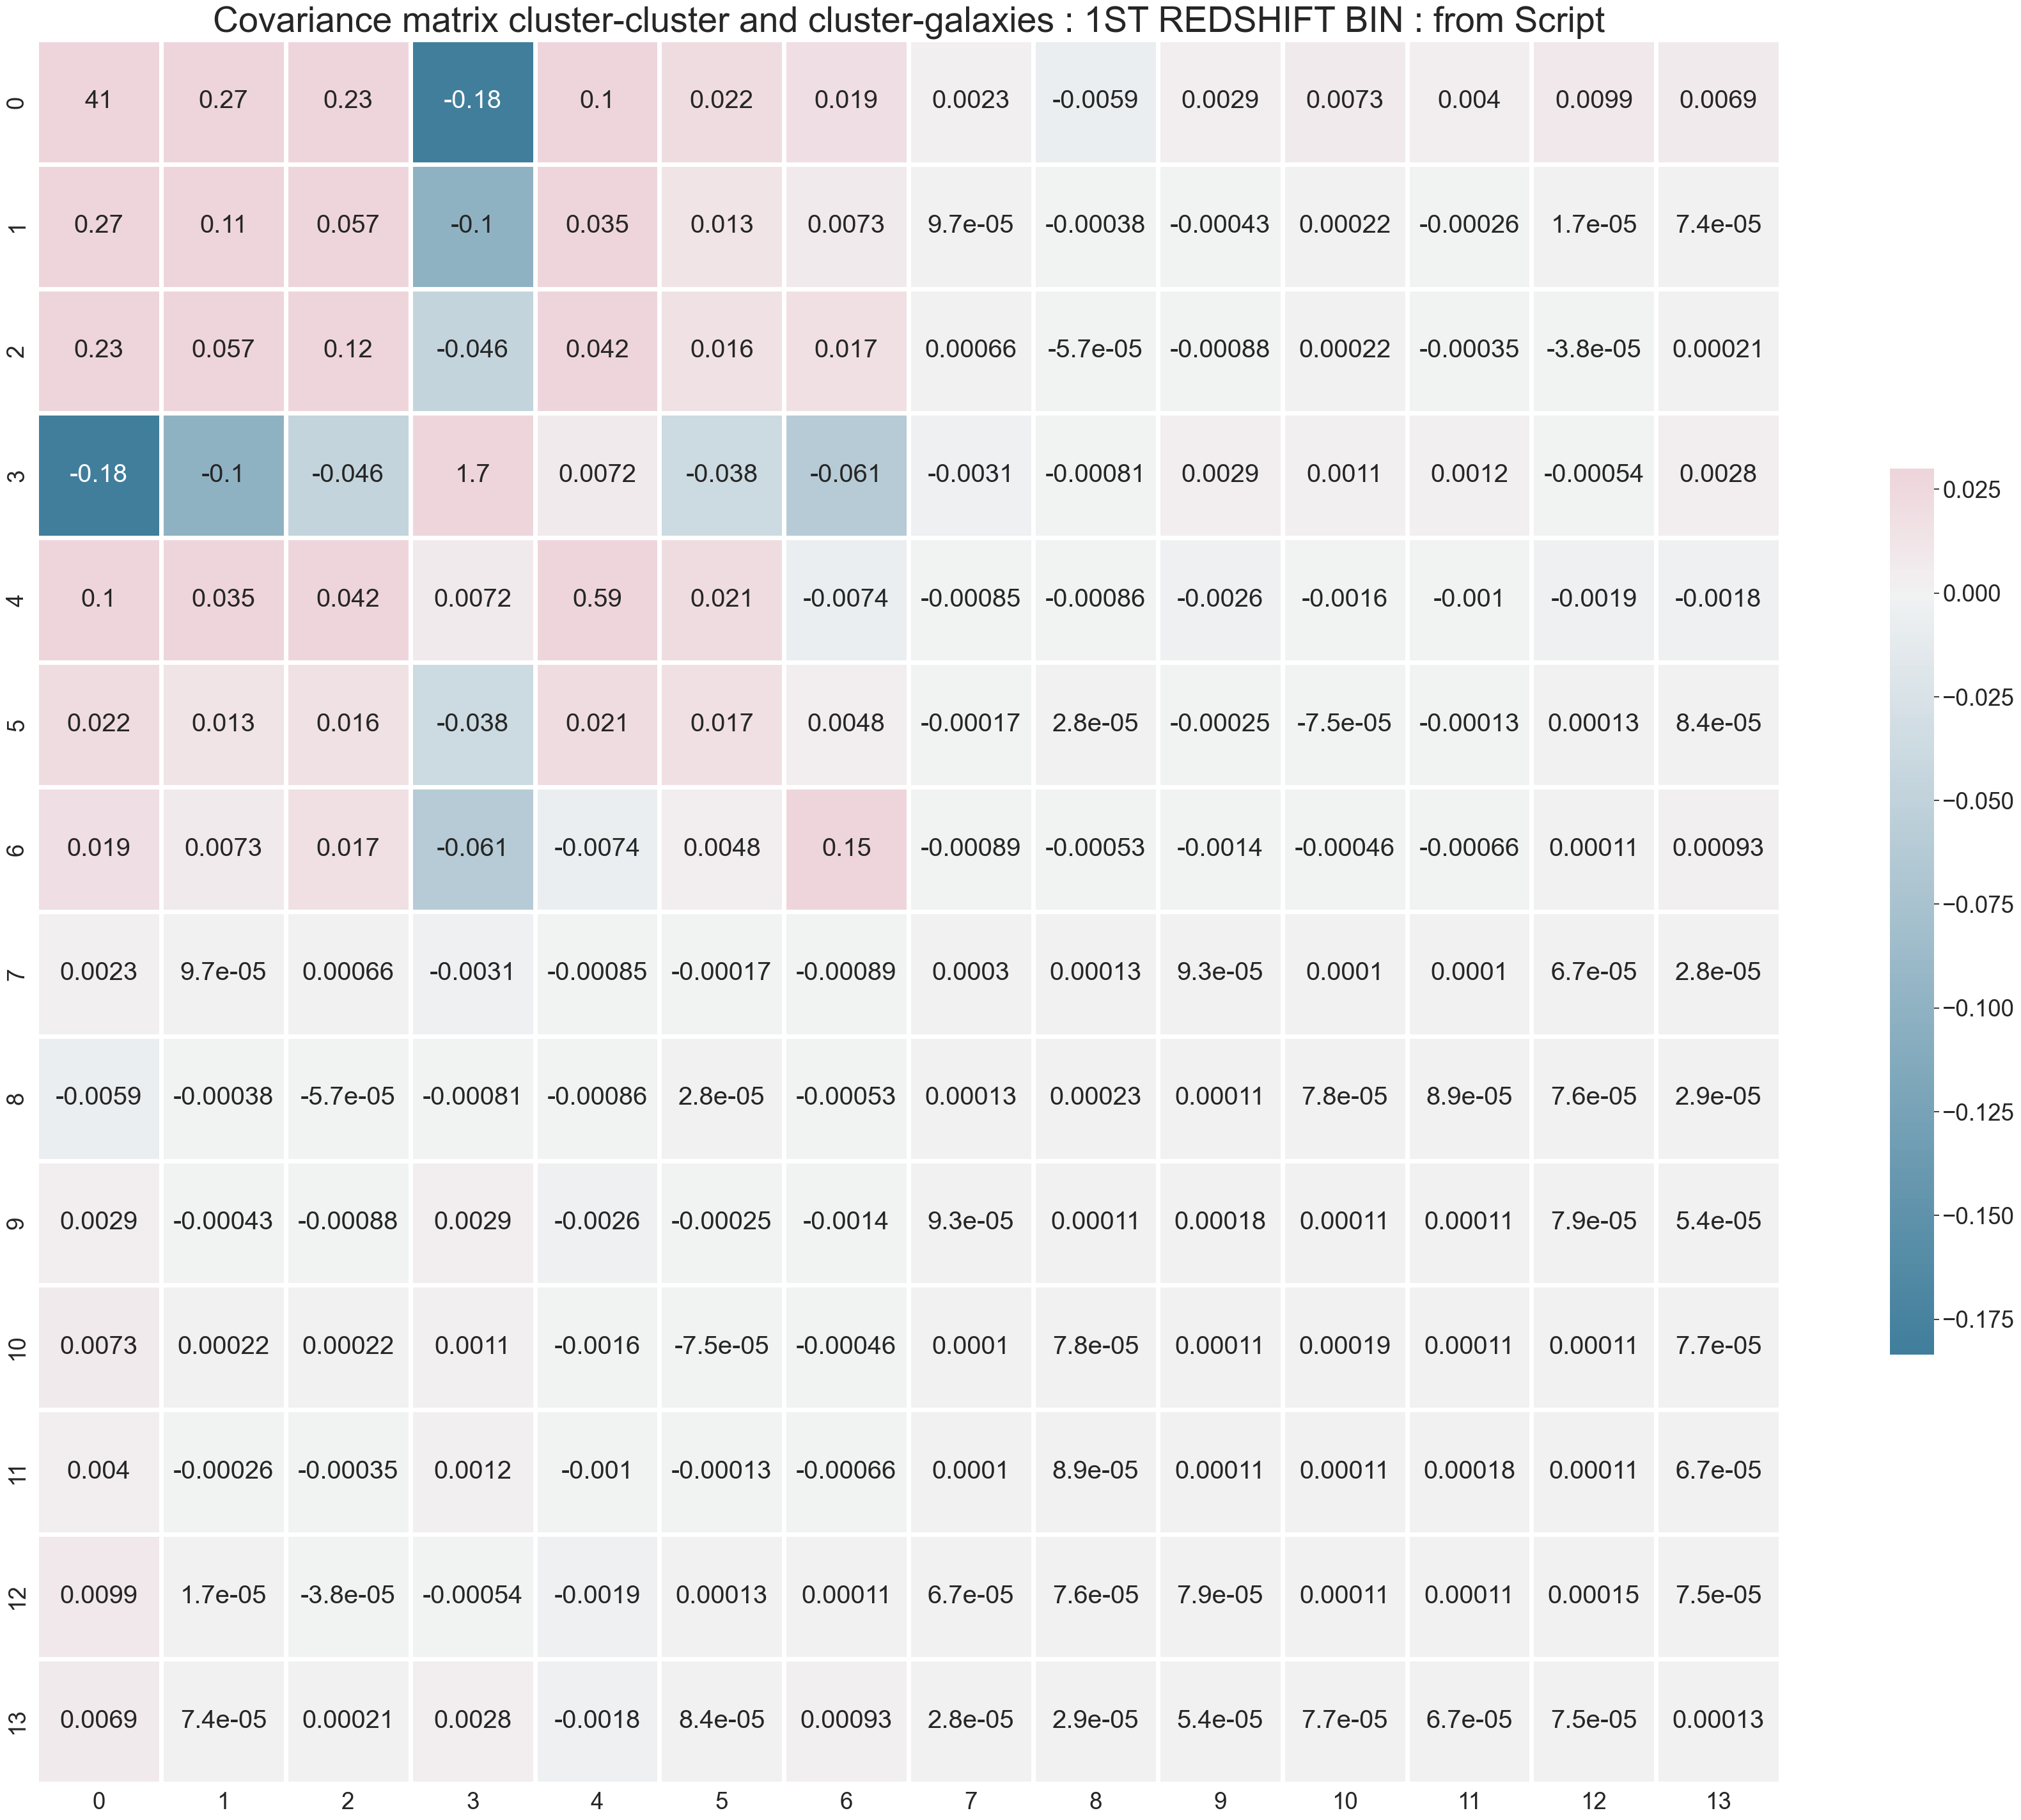

In [69]:
import seaborn as sns
sns.set_theme(style="white")
C = dataScript
sns.set(font_scale=2.4)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(C, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 0, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(C, cmap=cmap, vmax=.03, center=0,
            square=True, linewidths=5, annot=True,cbar_kws={"shrink": .5})
plt.title('Covariance matrix cluster-cluster and cluster-galaxies : 1ST REDSHIFT BIN : from Script',fontsize=40)

Text(0.5, 1.0, 'Covariance matrix cluster-cluster and cluster-galaxies : 1ST REDSHIFT BIN : from Notebook')

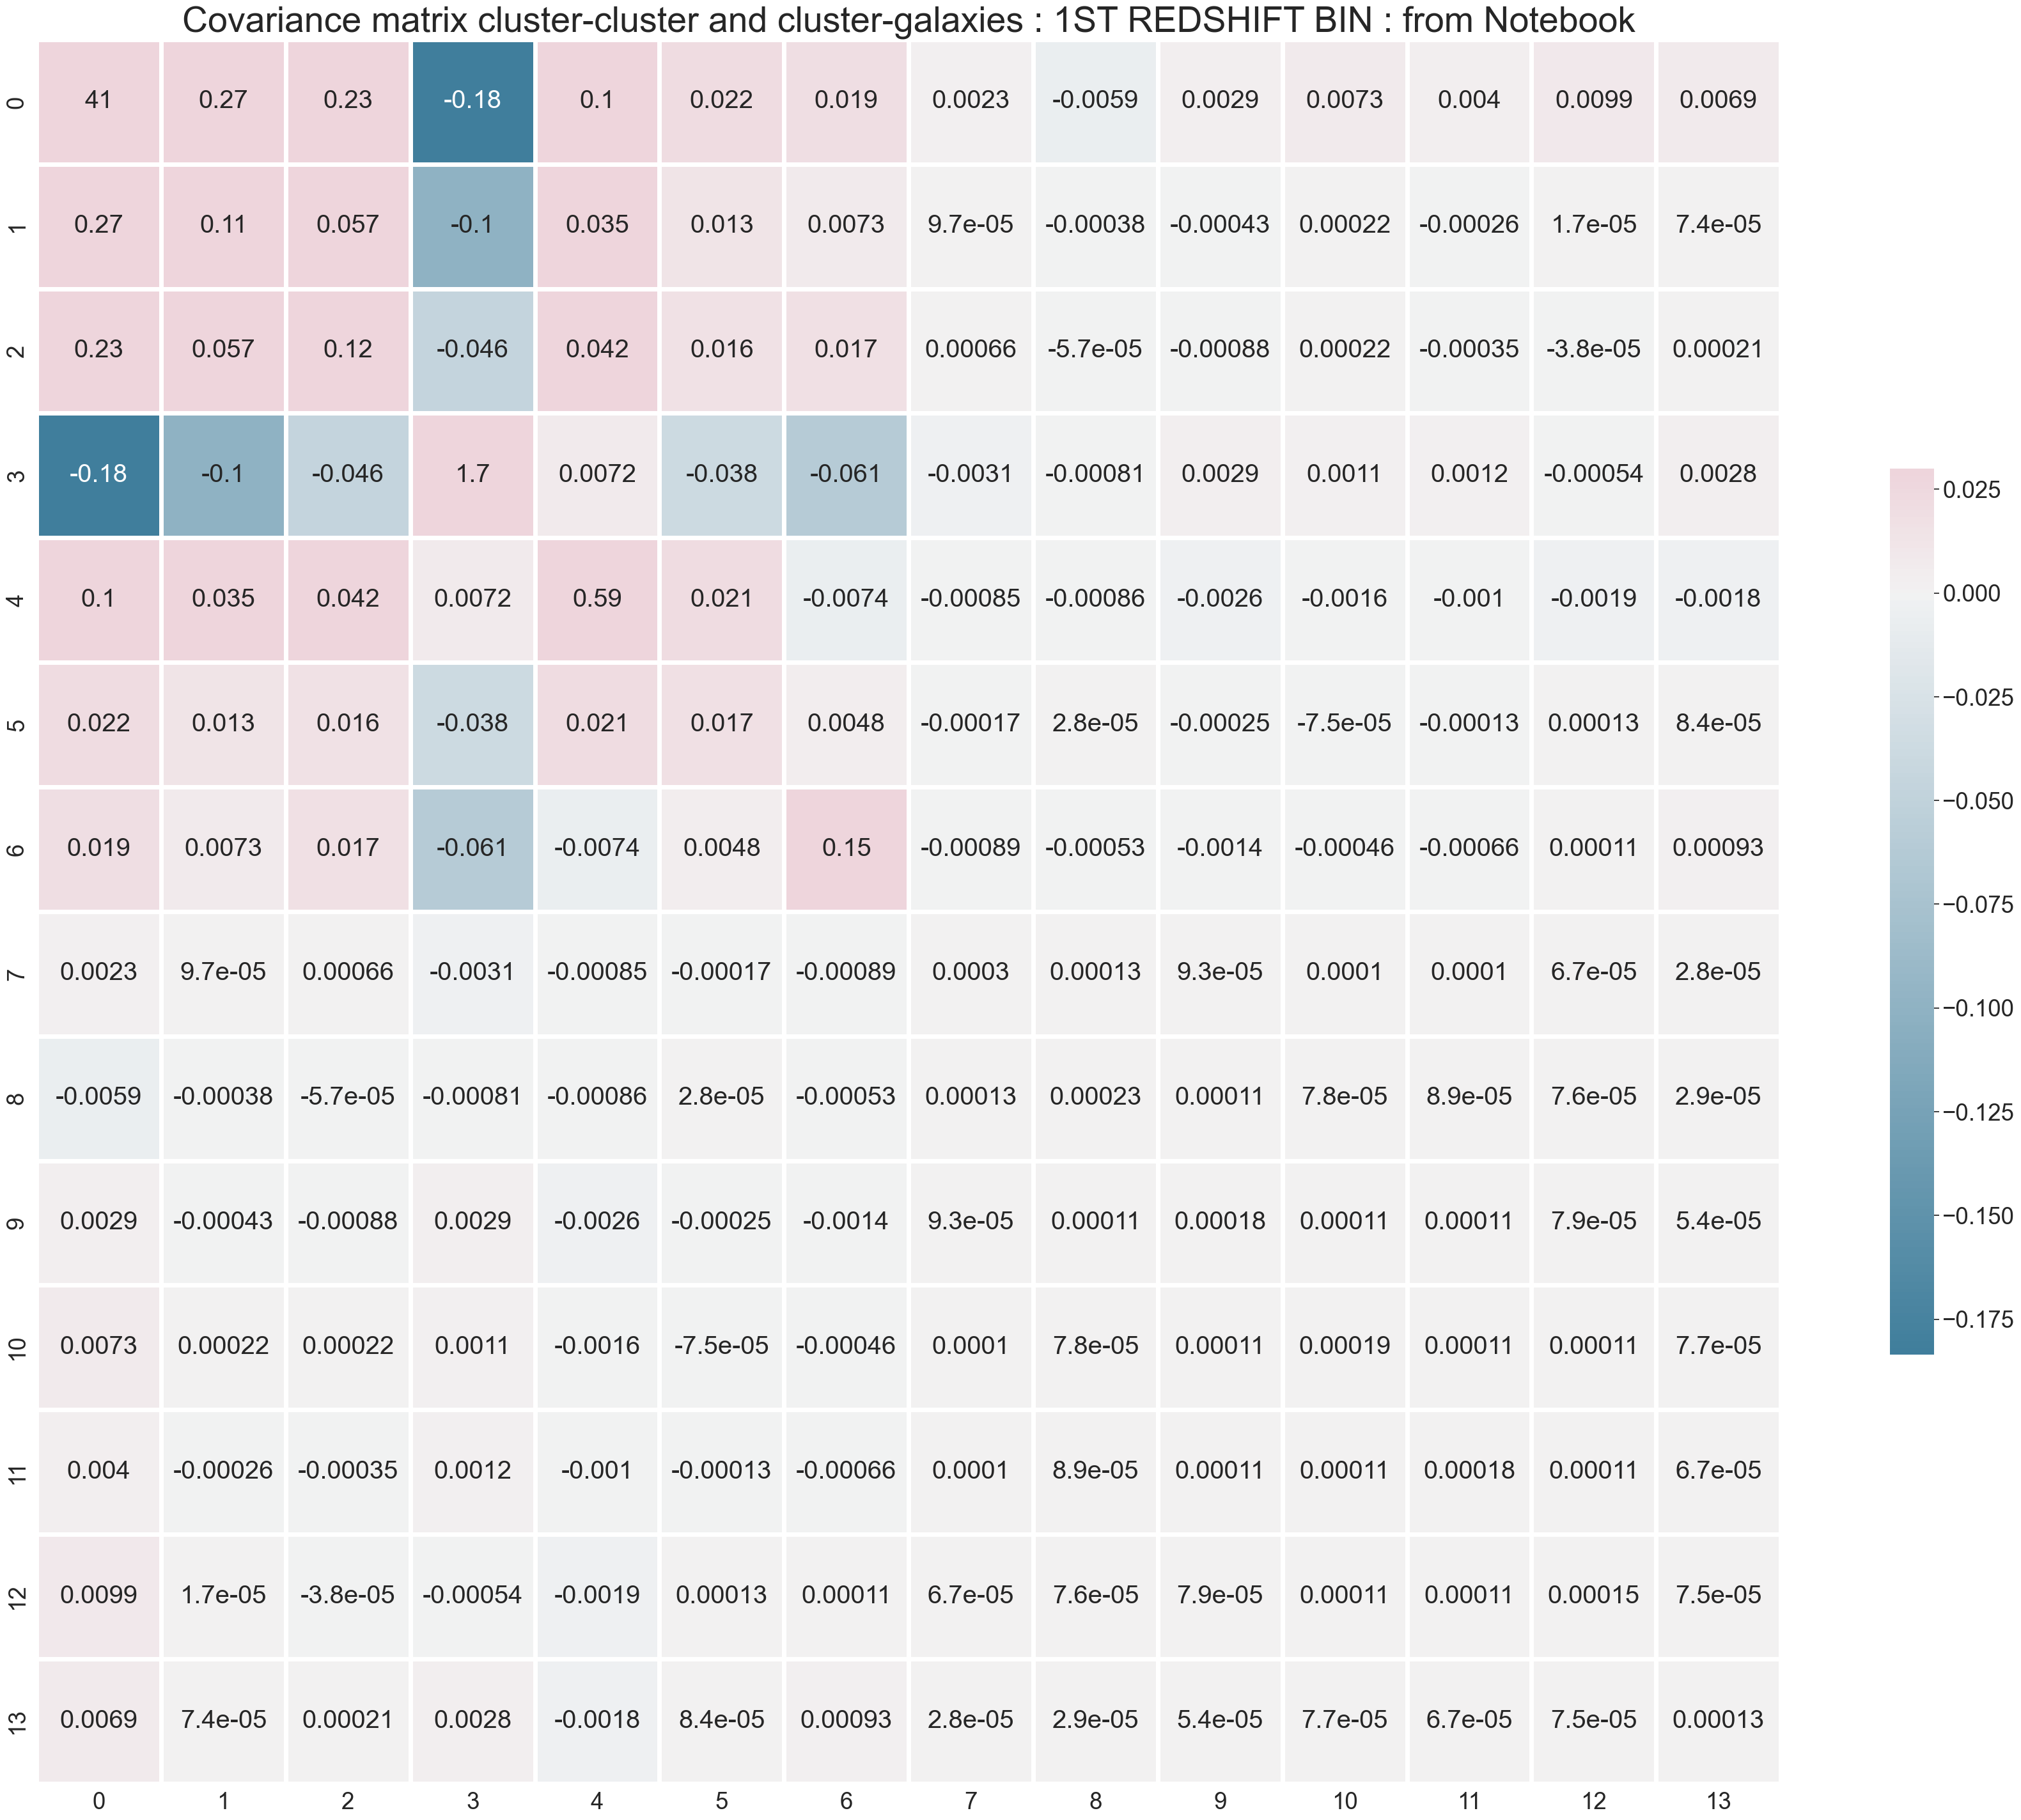

In [70]:
import seaborn as sns
sns.set_theme(style="white")
C = dataNote
sns.set(font_scale=2.4)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(C, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 0, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(C, cmap=cmap, vmax=.03, center=0,
            square=True, linewidths=5, annot=True,cbar_kws={"shrink": .5})
plt.title('Covariance matrix cluster-cluster and cluster-galaxies : 1ST REDSHIFT BIN : from Notebook',fontsize=40)

# This means that there are no bugs in your observation measurements !

In [ ]:
#s

In [ ]:
#t

In [ ]:
#o

In [ ]:
#p

In [ ]:
'''F I N  '''